### ✅ Step-by-step to check that the Dataframe is Normal or not

#### 📊 Histogram to show th distribution

In [2]:
# Import the file csv to get the columns Dataa and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data/customer_arrivals_with_outliers.csv')

column_number = df.select_dtypes(include=['number']).columns

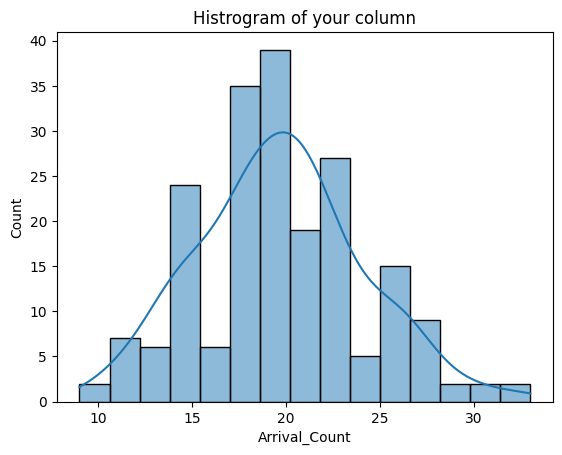

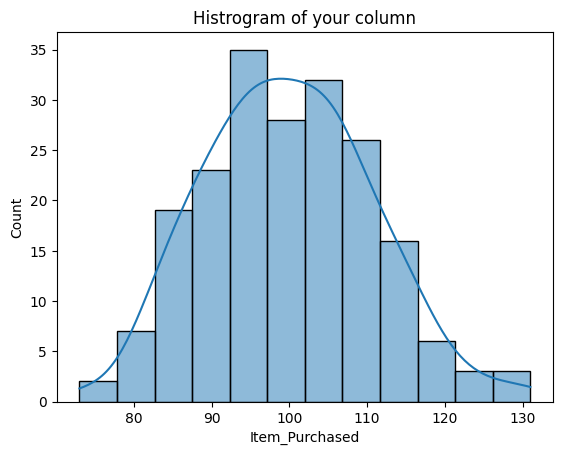

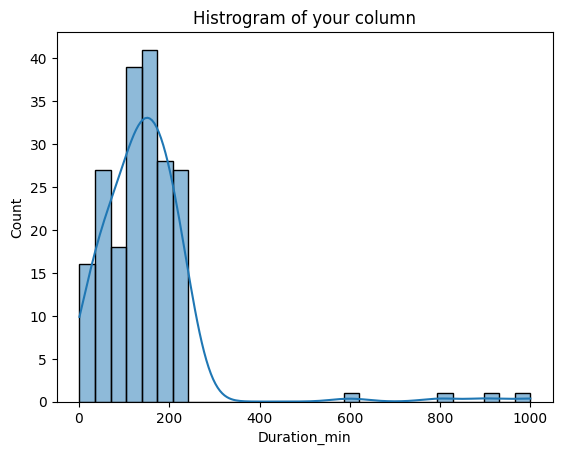

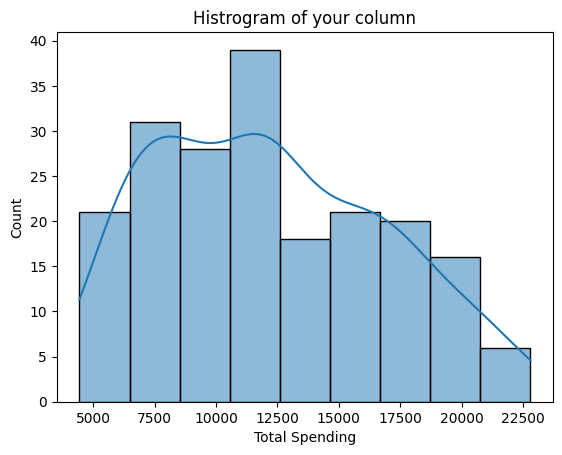

In [3]:
#Importing the lib for the visualization
import seaborn as sns
import matplotlib.pyplot as plt

for col in column_number:
  if col  in ['Duration_min','Arrival_Count','Item_Purchased','Total Spending']:
    sns.histplot(df[col],kde=True)
    plt.title('Histrogram of your column')
    plt.show()

### B. Q-Q Plot(Quatile-Quatile Plot)

Arrival_Count Visualization


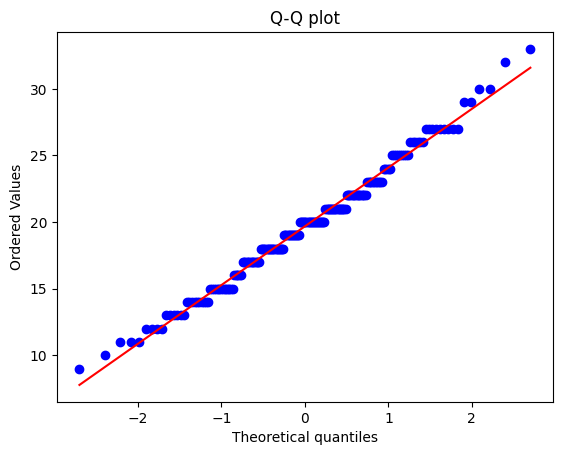

------------------------------------------------------------
Item_Purchased Visualization


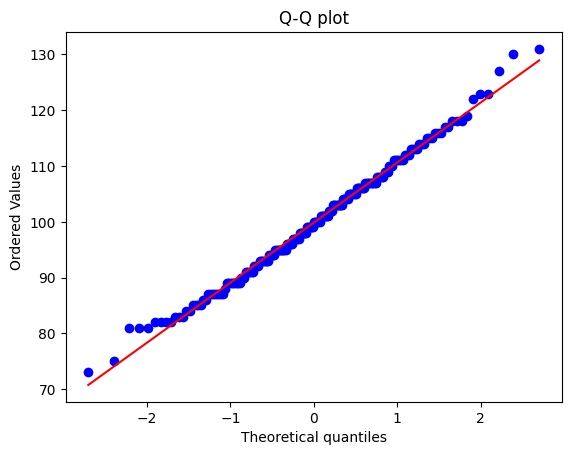

------------------------------------------------------------
Duration_min Visualization


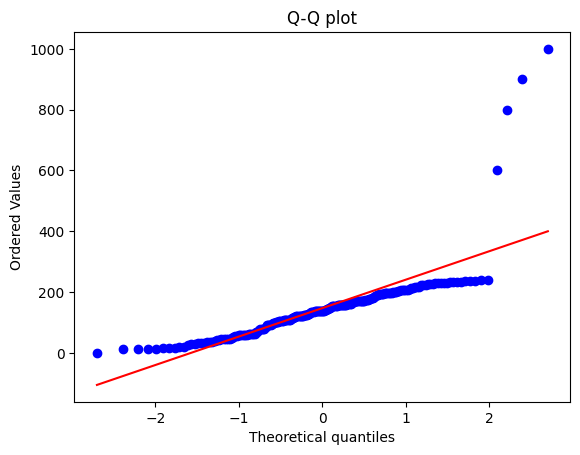

------------------------------------------------------------
Total Spending Visualization


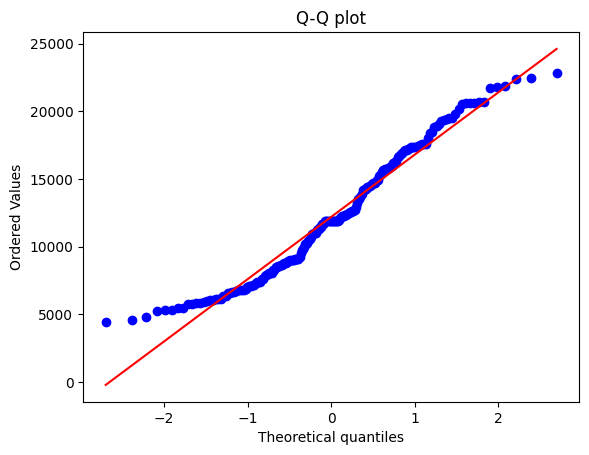

------------------------------------------------------------


In [4]:
#Importing the lib for the visualization
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in column_number:
  if col  in ['Duration_min','Arrival_Count','Item_Purchased','Total Spending']:
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title('Q-Q plot')
    print(f'{col} Visualization')
    plt.show()
    print("-"*60)
  

## 2. Numerical Measures

### A. Skewness and kurtosis

In [5]:
for col in column_number:
    if col  in ['Duration_min','Arrival_Count','Item_Purchased','Total Spending']:
      print(f'checking :{col} ')
      print("Skewness:", df[col].skew())
      print("Kurtosis:", df[col].kurt())
      print('-'*60)

checking :Arrival_Count 
Skewness: 0.23156360415618632
Kurtosis: 0.040652949522485216
------------------------------------------------------------
checking :Item_Purchased 
Skewness: 0.22608453352743002
Kurtosis: -0.12873349970576697
------------------------------------------------------------
checking :Duration_min 
Skewness: 4.245188392439605
Kurtosis: 25.900116741625247
------------------------------------------------------------
checking :Total Spending 
Skewness: 0.34813838903906125
Kurtosis: -0.8384059253629497
------------------------------------------------------------


## Testing for the Normal Dataset

  A. Shapiro-Walk Test(For small to medium datasets)
  
  B. D’Agostino’s K-squared Test (For large datasets)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Your existing outlier detection imports
from Outliers_function import tag_outliers

def plot_boxplots(df, numeric_columns):
    plt.figure(figsize=(15, len(numeric_columns) * 7))
    
    for i, col in enumerate(numeric_columns):
        plt.subplot(len(numeric_columns), 2, i+1)
        sns.boxplot(x=df[col], color='skyblue', fliersize=5)
        plt.title(f'Boxplot of {col} (Outliers Removed)', fontsize=12)
        plt.tight_layout()
    plt.show()

def process_outliers_and_plot(df, numeric_columns):
    cleaned_df = df.copy()
    for col in numeric_columns:
        if col not in cleaned_df.columns:
            print(f"❌ Column '{col}' not found in DataFrame!")
            continue
        
        print(f"📊 Checking column: {col}")
        stat, p = shapiro(cleaned_df[col])
        print("P-Value:", p)

        if p > 0.05:
            print("✅ Probably normal → using Z-score")
            cleaned_df = tag_outliers(cleaned_df, col,method='zscore')
        else:
            print("❌ Probably NOT normal → using IQR")
            cleaned_df = tag_outliers(cleaned_df, col,method='iqr')

        print('-' * 60)

    plot_boxplots(cleaned_df, numeric_columns)

    return cleaned_df



📊 Checking column: Duration_min
P-Value: 1.2432854975837185e-20
❌ Probably NOT normal → using IQR
Duration_min: Removed 4 outliers
------------------------------------------------------------
📊 Checking column: Arrival_Count
P-Value: 0.13337378395288596
✅ Probably normal → using Z-score
Arrival_Count: Removed 1 outliers
------------------------------------------------------------
📊 Checking column: Item_Purchased
P-Value: 0.4670719300215525
✅ Probably normal → using Z-score
Item_Purchased: Removed 0 outliers
------------------------------------------------------------
📊 Checking column: Total Spending
P-Value: 2.9873427078015043e-05
❌ Probably NOT normal → using IQR
Total Spending: Removed 0 outliers
------------------------------------------------------------


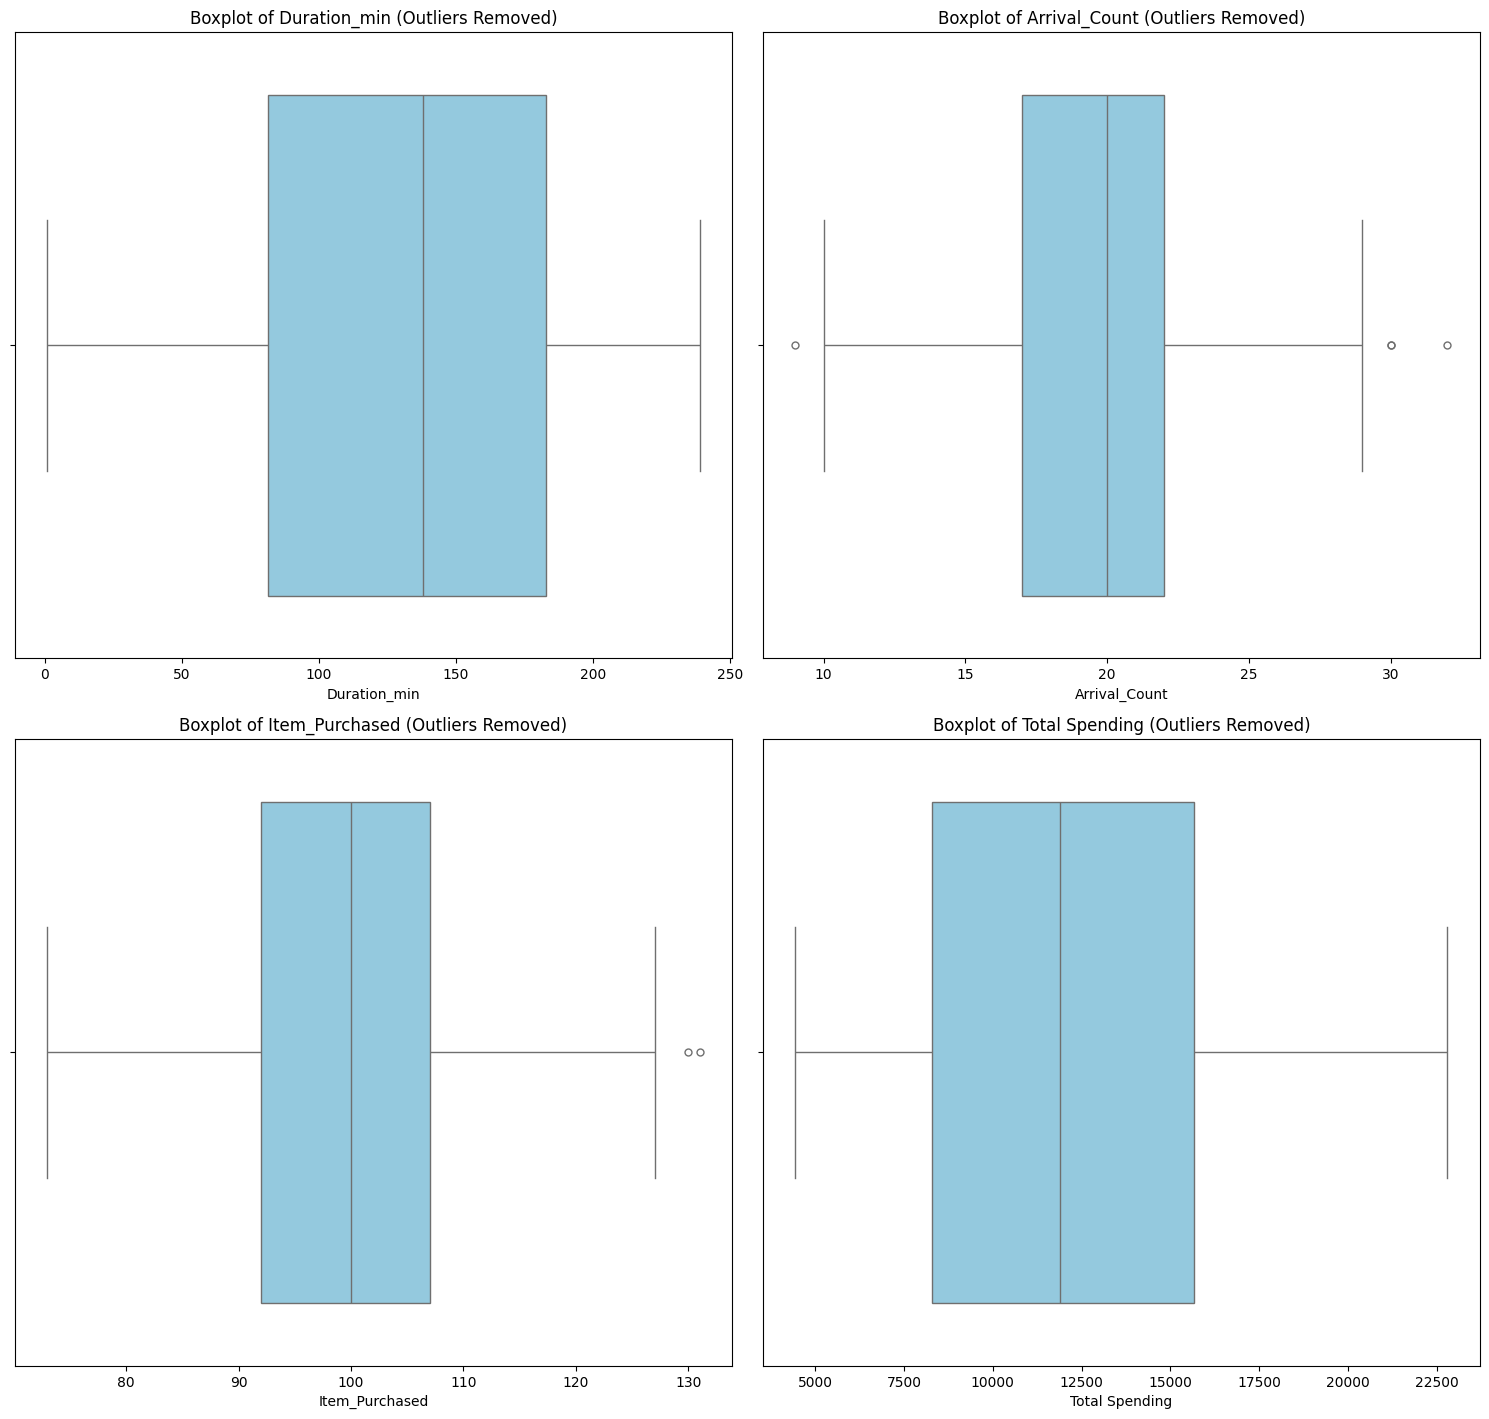

In [11]:
numeric_cols = ['Duration_min','Arrival_Count','Item_Purchased','Total Spending']
df_cleaned = process_outliers_and_plot(df, numeric_cols)
df_cleaned.to_csv(('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data/customer_arrivals_removed_outliers_.csv'),index=False)